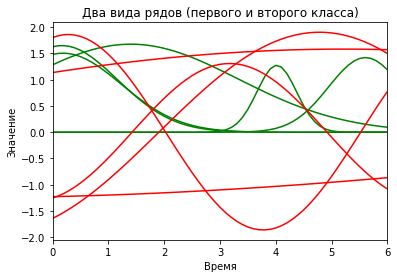

data.shape = (12200, 4)
data.id.nunique() = 200


,t,y,label,id
0,0.0,1.957849,1,0
1,0.1,1.957849,1,0
2,0.2,1.957849,1,0


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, EfficientFCParameters, MinimalFCParameters

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan

N = 100 ## количество семплов каждого класса
Nvis = 5 ## сколько семплов будем визуализировать
timePoints = 61  ## количество элементов в каждом из рядов

df = pd.DataFrame()
data = pd.DataFrame()
t = np.linspace(0, 6, timePoints) 

random.seed(42)

## генерируем семплы первого класса
for i in range(N):
    t0 = 2*np.pi*random.random()
    a1 = 5*random.random()
    A = 1 + random.random()        
    
    df['t']  = t                   ## ось времени
    df['y']  = A*np.exp(-(df.t-t0)**2/2/a1)  ## значения временного ряда
    df['label'] = 1                ## класс временного ряда 
    df['id'] = i                   ## номер временного ряда
    
    data = data.append(df)         ## добавляем семпл в общий дейтафрейм
    if i < Nvis:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='g') 
    
## генерируем семплы второго класса    
for i in range(N, 2*N):
    A = 1 + random.random()          ## амплитуда
    w = 0 + random.random()          ## частота
    ph = 2*np.pi * random.random()   ## фаза
    
    df['t']  = t                     ## ось времени
    df['y']  = A*np.sin(t*w + ph)    ## значения временного ряда
    df['label'] = 0                  ## класс временного ряда 
    df['id'] = i                     ## номер временного ряда
    
    data = data.append(df)           ## добавляем семпл в общий дейтафрейм
    if i < Nvis+N:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='r') 
    
## cдвигаем все значения вверх, чтобы все значения были положительными    
data['y'] = data.y + np.abs(data.y.min())
    
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title('Два вида рядов (первого и второго класса)')
plt.xlim([t[0], t[-1]])
plt.show()

print('data.shape =', data.shape)
print('data.id.nunique() =', data.id.nunique())
data.head(3)

#В следующих заданиях требуется выделять признаки из рядов.

#### Задание 8.19.1

Посчитайте максимальное, минимальное, среднее и медианное значение для каждого временного ряда. Подсказка: используйте функцию pandas.DataFrame.groupby(). 

Укажите эти значения, округлённые до второго знака после запятой, для временного ряда с id = 3.

Укажите максимальное значение:

Укажите минимальное значение:
    
Укажите среднее значение:
        
Укажите медианное значение:

In [10]:
print('data.t.nunique() =', data.t.nunique())
print('data.id.nunique() =', data.id.nunique())

data.t.nunique() = 61
data.id.nunique() = 200


In [11]:
dfs = dict(tuple(data.groupby('id')))
dfs_mmmm = dfs[3]['y'].agg(['min', 'mean', 'max', 'median'])  
print(np.round(dfs_mmmm, 2))

min       1.96
mean      2.34
max       3.46
median    2.00
Name: y, dtype: float64


#### Задание 8.19.2
Создайте датафрейм features с посчитанными фичами (минимальное, среднее и медианное значение) для каждого из рядов, содержащий, помимо фич, колонки:

'id', 'label'.

Запустите алгоритм в следующей ячейке. Укажите количество false negatives.

In [12]:
def featuresTSFresh(data, extraction_settings):    

    featuresDF = extract_features(
        data, 
        column_id='id',  ## номер временного ряда
        column_sort='t', ## ось времени
        default_fc_parameters=extraction_settings, ## список фич, которые хотим извлечь
        impute_function=impute                     ## заменить все inf и NaN
    )
    
    ## вытаскиваем колонку id из индекса 
    featuresDF = featuresDF.reset_index()

    return featuresDF

In [13]:
extraction_settings = \
    {
        "minimum": None,
        "mean": None,
        "median": None,     
    }

features = featuresTSFresh(data, extraction_settings)
print(features)

## помечаем ряды (добавляем обратно первый и второй класс)
features['label'] = 0
features['label'].iloc[N:] = 1  

print('data.shape =', data.shape)                        
print('features.shape =', features.shape)
features.head(3)

Feature Extraction: 100%|███████████████████████| 15/15 [00:00<00:00, 74.98it/s]

     index  y__minimum   y__mean  y__median  label__minimum  label__mean  \
0        0    1.957849  2.143130   1.957977             1.0          1.0   
1        1    2.052910  2.972939   3.143508             1.0          1.0   
2        2    1.957849  2.246776   1.958426             1.0          1.0   
3        3    1.957850  2.339297   1.998222             1.0          1.0   
4        4    1.957850  2.354036   1.986966             1.0          1.0   
..     ...         ...       ...        ...             ...          ...   
195    195    0.714004  1.203662   1.008454             0.0          0.0   
196    196    0.847096  0.922809   0.921486             0.0          0.0   
197    197    0.828983  1.305666   1.257858             0.0          0.0   
198    198    0.618728  2.110081   2.270264             0.0          0.0   
199    199    1.548715  1.585773   1.585714             0.0          0.0   

     label__median  
0              1.0  
1              1.0  
2              1.0  
3  


/home/dex/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,index,y__minimum,y__mean,y__median,label__minimum,label__mean,label__median,label
0,0,1.957849,2.143130,1.957977,1.0,1.0,1.0,0
1,1,2.052910,2.972939,3.143508,1.0,1.0,1.0,0
2,2,1.957849,2.246776,1.958426,1.0,1.0,1.0,0


trainSet.shape = (120, 8)
testSet.shape  = (80, 8)

Value counts train:
 0    60
1    60
Name: label, dtype: int64

Value counts test:
 0    40
1    40
Name: label, dtype: int64


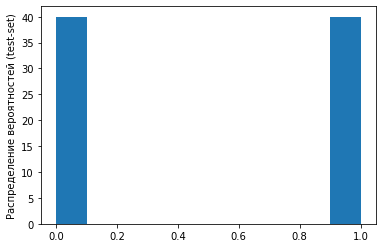

         features  importances
5   label__median         0.35
4     label__mean         0.34
3  label__minimum         0.31
0      y__minimum         0.00
1         y__mean         0.00
2       y__median         0.00

   Pos  Neg
0   40    0
1    0   40

AUC = 1.000  Точность = 1.000



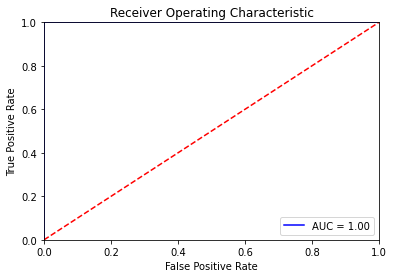

In [14]:
trainSet, testSet = train_test_split(features, test_size=0.4, random_state=42) 

## выводим статистику по нашим наборам
print('trainSet.shape =', trainSet.shape)
print('testSet.shape  =', testSet.shape)
print()
print('Value counts train:\n', trainSet.label.value_counts())
print()
print('Value counts test:\n', testSet.label.value_counts())

## лист фич
featureList = trainSet.drop(['index', 'label'], axis=1).columns

## параметры классификатора
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2, 'max_features' : 1.0, 'class_weight' : 'balanced', 'random_state': 42}

## обучаем классификатор
clf = RandomForestClassifier(**params).fit(trainSet[featureList], trainSet['label'])

## делаем предсказание на тестовом наборе
y_pred = clf.predict(testSet[featureList])
y_pred_proba = clf.predict_proba(testSet[featureList])[:, 1]  ## вероятности

## визуализируем вероятности для предсказаний
plt.hist(y_pred_proba)
plt.ylabel('Распределение вероятностей (test-set)')
plt.show()
## создадим для удобства дейтафрейм с результатами
res = testSet
res['pred'] = y_pred 
res['pred_proba'] = y_pred_proba

## получаем из классификатора важность фич и отображаем их
ftmprt = pd.DataFrame()
ftmprt['features'] = featureList
ftmprt['importances'] = clf.feature_importances_
ftmprt = ftmprt.sort_values('importances', ascending=False)
print(ftmprt.head(20))
print()
proba = res.pred_proba

## считаем матрицу ошибок
CM = confusion_matrix(res['label'], res['pred'])
CM_DF = pd.DataFrame(data=CM, columns = ['Pos', 'Neg'])
print(CM_DF)

# ROC-AUC 
FPR, TPR, thresholds = roc_curve(res['label'], res['pred_proba'])
roc_auc = auc(FPR, TPR)
acc = res[res['pred'] == res['label']].shape[0] / res.shape[0] ## точность
print(f"\nAUC = {roc_auc:.3f}  Точность = {acc:.3f}\n")

# ROC-кривая
plt.title('Receiver Operating Characteristic')
plt.plot(FPR, TPR, 'b', label=f'AUC = {roc_auc:.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Задание 8.19.3
Посчитайте те же четыре фичи (max, min, mean, median), а также "count_below_mean" при помощи пакета TSFresh, результат запишите в датафрейм features. Укажите значение count_below_mean для ряда с id == 4. Ответ округлите до целого числа.

In [7]:
#Если у кого-то при выполнении 8.19.3 будет зависать extract_features, примените костыль:
if __name__ == "__main__":
    features = extract_features(data,
                                  column_id='id',
                                  column_sort='t',
                                  default_fc_parameters=extraction_settings)

Feature Extraction: 100%|███████████████████████| 15/15 [00:00<00:00, 68.19it/s]
